In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re
import numpy as np

In [28]:
logs_df = pd.read_csv('logs.csv')
print(len(logs_df))
logs_df = logs_df[(logs_df['vehicle_type'] == 'IC') | (logs_df['vehicle_type'] == 'P') |
                  (logs_df['vehicle_type'] == 'S') | (logs_df['vehicle_type'] == 'L')]
print(len(logs_df))
def get_line_number(vehicle):
    pattern = re.compile("^([A-Z]+)[0-9]+$")
    vehicle_type = pattern.match(vehicle).group(1)
    pattern = re.compile("^[A-Z]+([0-9]+)$")
    vehicle_nr = int(pattern.match(vehicle).group(1))
    line_nr = 0
    if vehicle_type == 'IC':
        line_nr = str(int(100 * np.floor(vehicle_nr / 100)))
    elif vehicle_type == 'L':
        line_nr = str(int(50 * np.floor(vehicle_nr / 50)))
    elif vehicle_type == 'S':
        line_nr = str(int(50 * np.floor(vehicle_nr / 50)))
    else:
        line_nr = 'P'
    
    return vehicle_nr, line_nr

logs_df['line'], logs_df['line_cat'] = zip(*logs_df['vehicle'].map(get_line_number))
print(logs_df)
logs_df.to_csv('logs.csv')

3031
3031
      Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1       to  month   from_lat  \
0              0             0             0  8896735     12  51.035896   
1              1             1             1  8813003     11  50.859663   
2              2             2             2  8814001     11  51.035896   
3              3             3             3  8833001     10  50.859663   
4              4             4             4  8814118      9  50.835707   
5              5             5             5  8892007      9  50.990842   
6              6             6             6  8891009     10  51.035896   
7              7             7             7  8892007     10  50.824506   
8              8             8             8  8814001     11  50.896456   
9              9             9             9  8843208     10  50.624550   
10            10            10            10  8841004     10  50.859663   
11            11            11            11  8822004      8  50.859663   
12            1

In [29]:
df = logs_df.groupby(['line'])['clf_occupancy'].agg(lambda x: ','.join(x))
occupancy_hist_per_line = []
for i in df.index:
    _count = len(df.loc[i].split(','))
    print(i)
    occupancy_hist_per_line.append([i, _count, df.loc[i].count('low')/_count, df.loc[i].count('medium')/_count,
                                     df.loc[i].count('high')/_count])
occupancy_df = pd.DataFrame(occupancy_hist_per_line)
occupancy_df.columns = ['line', 'count', 'low', 'medium', 'high']

occupancy_df = occupancy_df[occupancy_df['count']>4].sort(columns=['high','count'], ascending=False)
occupancy_df = occupancy_df.head(25)
print(occupancy_df)

407
408
409
410
411
412
414
415
416
417
420
426
428
429
430
431
432
433
434
436
437
439
440
441
442
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
528
529
530
532
533
534
535
536
537
538
539
540
542
543
544
554
556
557
559
560
562
563
564
567
569
570
577
579
582
583
584
585
587
588
589
590
591
592
593
706
707
708
710
712
713
714
715
716
718
719
722
723
728
729
730
731
732
733
734
735
736
737
738
739
742
759
763
770
776
778
779
786
788
789
807
815
816
819
822
832
835
837
839
858
867
868
870
883
885
889
906
911
929
936
938
941
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1607
1619
1632
1633
1687
1705
1707
1708
1710
1711
1712
1713
1714
1715
1717
1718
1719
1720
1728
1729
1730
1731
1732
1734
1736
1738
1739
1740
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
183

(0.625, 26.125)

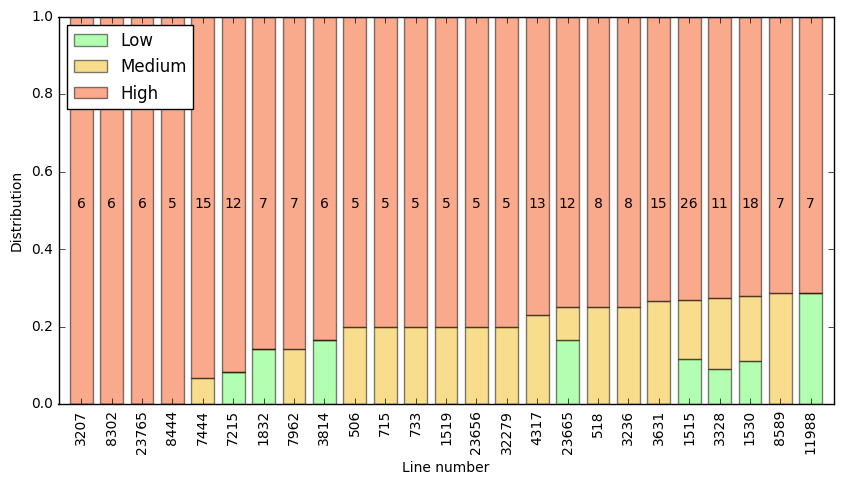

In [30]:
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(occupancy_df['low']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the pre_score data
        occupancy_df['low'], 
        # set the width
        width=bar_width,
        # with the label pre score
        label='Low', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#66ff66')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the mid_score data
        occupancy_df['medium'], 
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=occupancy_df['low'], 
        # with the label mid score
        label='Medium', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F1BD1A')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the post_score data
        occupancy_df['high'], 
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(occupancy_df['low'],occupancy_df['medium'])], 
        # with the label post score
        label='High', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F4561D')

# set the x ticks with names
plt.xticks(tick_pos, occupancy_df['line'], rotation='vertical')

# Set the label and legends
ax1.set_ylabel("Distribution")
ax1.set_xlabel("Line number")

for rect, label in zip(ax1.patches, occupancy_df['count'].values.astype(str)):
    ax1.text(rect.get_x() + rect.get_width()/2, 0.5, label, ha='center', va='bottom')
    
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

In [31]:
df = logs_df.groupby(['line_cat'])['clf_occupancy'].agg(lambda x: ','.join(x))
occupancy_hist_per_line = []
for i in df.index:
    _count = len(df.loc[i].split(','))
    print(i)
    occupancy_hist_per_line.append([i, _count, df.loc[i].count('low')/_count, df.loc[i].count('medium')/_count,
                                     df.loc[i].count('high')/_count])
occupancy_df = pd.DataFrame(occupancy_hist_per_line)
occupancy_df.columns = ['line', 'count', 'low', 'medium', 'high']

occupancy_df = occupancy_df[occupancy_df['count']>4].sort(columns=['high','count'], ascending=False)
occupancy_df = occupancy_df.head(25)
print(occupancy_df)

102050
103850
107000
11750
11950
12100
12300
12700
13300
1500
1600
1650
1700
1800
1850
1900
19700
2000
203050
206450
2100
2200
2300
23650
23750
2400
2450
2500
2550
2600
2650
2750
2800
2850
2900
2950
3000
3100
3150
3200
32250
3300
3400
3600
3700
37050
37950
3800
38050
3900
400
4000
4100
4200
42150
4250
4300
4350
4400
4450
4500
4550
4600
4850
4950
500
5000
5150
5250
5300
53350
53550
550
5550
5850
61550
6250
67550
67950
68550
700
73450
750
800
817650
818650
83950
850
85650
86350
86550
900
9200
93250
P
     line  count       low    medium      high
44   3700     31  0.225806  0.258065  0.516129
39   3200     53  0.207547  0.283019  0.509434
26   2450     13  0.461538  0.076923  0.461538
73   5550      9  0.444444  0.111111  0.444444
20   2100     43  0.279070  0.279070  0.441860
63   4850     16  0.250000  0.312500  0.437500
60   4500     56  0.339286  0.232143  0.428571
54  42150      7  0.285714  0.285714  0.428571
23  23650     39  0.333333  0.256410  0.410256
94      P    298  0.291946

(0.625, 26.125)

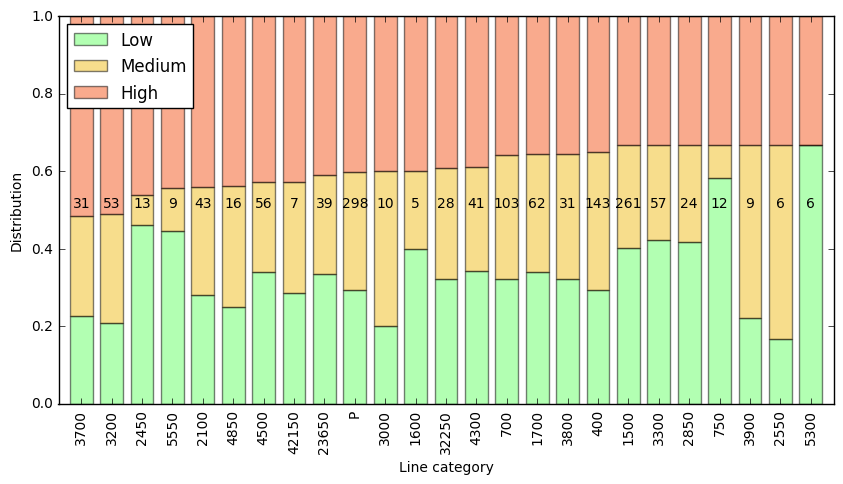

In [32]:
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(occupancy_df['low']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the pre_score data
        occupancy_df['low'], 
        # set the width
        width=bar_width,
        # with the label pre score
        label='Low', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#66ff66')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the mid_score data
        occupancy_df['medium'], 
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=occupancy_df['low'], 
        # with the label mid score
        label='Medium', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F1BD1A')

# Create a bar plot, in position bar_1
ax1.bar(bar_l, 
        # using the post_score data
        occupancy_df['high'], 
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(occupancy_df['low'],occupancy_df['medium'])], 
        # with the label post score
        label='High', 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F4561D')

# set the x ticks with names
plt.xticks(tick_pos, occupancy_df['line'], rotation='vertical')

# Set the label and legends
ax1.set_ylabel("Distribution")
ax1.set_xlabel("Line category")

for rect, label in zip(ax1.patches, occupancy_df['count'].values.astype(str)):
    ax1.text(rect.get_x() + rect.get_width()/2, 0.5, label, ha='center', va='bottom')
    
plt.legend(loc='upper left')

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])